In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.stats import beta
from scipy.optimize import newton
from pynverse import inversefunc

### Qualification rates in different groups

In [3]:
alpha_a,alpha_b = 0.5,0.5

### Feature distribution in different group

In [4]:
def GG1a(x, a=5, b=1):
    return beta.cdf(x, a, b, loc=0, scale=1)
def G1a(x, a=5, b=1):
    return beta.pdf(x, a, b, loc=0, scale=1)

def GG0a(x, a=2, b=2):
    return beta.cdf(x, a, b, loc=0, scale=1)
def G0a(x, a=2, b=2):
    return beta.pdf(x, a, b, loc=0, scale=1)

def GG1b(x, a=3, b=2):
    return beta.cdf(x, a, b, loc=0, scale=1)
def G1b(x, a=3, b=2):
    return beta.pdf(x, a, b, loc=0, scale=1)

def GG0b(x, a=2, b=5):
    return beta.cdf(x, a, b, loc=0, scale=1)
def G0b(x, a=2, b=5):
    return beta.pdf(x, a, b, loc=0, scale=1)




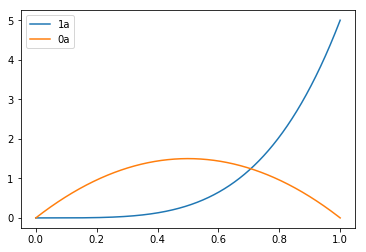

In [5]:
x = np.linspace(0, 1, 5000)
plt.plot(x, G1a(x),label='1a');
plt.plot(x, G0a(x),label='0a');
plt.legend()
plt.savefig('a.png')

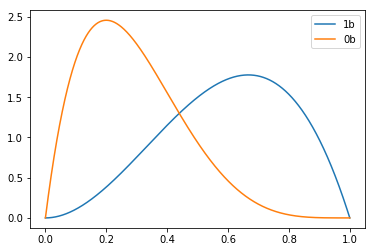

In [6]:
x = np.linspace(0, 1, 5000)

plt.plot(x, G1b(x),label='1b');
plt.plot(x, G0b(x),label='0b');
plt.legend()
plt.savefig('b.png')

## Policy 2
$P(Y=1\mid X=\theta, S=a )>0.5$, $P(Y=1\mid X=\theta, S=b )>0.5$

In [7]:
pa = 0.8
pb = 0.2

def p1a(x):
    return G1a(x) 

def p0a(x):
    return G0a(x)

def pa(x,alpha_a):
    return p1a(x) * alpha_a + p0a(x)*(1-alpha_a)

def gammaa(x,alpha_):
    return p1a(x)*alpha_a/pa(x,alpha_a)

def p1b(x):
    return G1b(x) 

def p0b(x):
    return G0b(x)

def pb(x,alpha_b):
    return p1b(x) * alpha_b + p0b(x)*(1-alpha_b)

def gammab(x,alpha_b):
    return p1b(x)*alpha_b/pb(x,alpha_b)
    
gammaa_ori = (lambda x: gammaa(x,alpha_a))
gammab_ori = (lambda x: gammab(x,alpha_b))

inv_gammaa_ori = inversefunc(gammaa_ori, domain=[0,1], open_domain=[False,False])
inv_gammab_ori = inversefunc(gammab_ori, domain=[0,1], open_domain=[False,False])


In [8]:
thetaa = inv_gammaa_ori(0.5)
thetab = inv_gammab_ori(0.5)
print(gammaa(thetaa,alpha_a),thetaa)
print(gammab(thetab,alpha_b),thetab)

print('theta a is ', thetaa)
print('theta b is ', thetab)

0.4999999989746459 0.7063353769918405
0.49999999961181757 0.439713706332034
theta a is  0.7063353769918405
theta b is  0.439713706332034


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


### Different rejection rates in different groups
- Potential discrimination of Policy 2. 
- Although the qualification rates in both groups are same, with the given feature distributions in groups, Policy 2 is not fair for group b with a higher rejection rate.

In [9]:
p_blk_a = alpha_a * GG1a(thetaa) + (1-alpha_a) * GG0a(thetaa)
p_blk_b = alpha_b * GG1b(thetab) + (1-alpha_b) * GG0b(thetab)
p_blk_1a = GG1a(thetaa)
p_blk_1b = GG1b(thetab)
p_blk_0a = GG0a(thetaa)
p_blk_0b = GG0b(thetab)

print('Rejection rate in group a: ',p_blk_a,
      '\nRejection rate in group b: ',p_blk_b)

Rejection rate in group a:  0.4838742218357471 
Rejection rate in group b:  0.5256573604180689


### Arrival and service intensity, and effective offer load

In [10]:
def fa(p_blk_a):
    return 40* p_blk_a

def fb(p_blk_b):
    return 10*p_blk_b

lamda_a = fa(p_blk_a)
lamda_b = fb(p_blk_b)

mu1 = 0.1
mu0 = 1

lamda_1a,lamda_0a = lamda_a * alpha_a,lamda_a * (1-alpha_a)
lamda_1b,lamda_0b = lamda_b * alpha_b,lamda_b * (1-alpha_b)

sigma_1a = lamda_1a * (1-p_blk_1a)/mu1
sigma_1b = lamda_1b * (1-p_blk_1b)/mu1

sigma_0a = lamda_0a * (1-p_blk_0a)/mu0
sigma_0b = lamda_0b * (1-p_blk_0b)/mu0

### The average number of different people in the company
- Potential discimination 

In [11]:
N_1a = sigma_1a
N_1b = sigma_1b
N_0a = sigma_0a
N_0b = sigma_0b
print('The numbe of group a people in the company: ',N_1a+N_0a,
      '\nThe numbe of group b people in the company: ',N_1b+N_0b)

The numbe of group a people in the company:  81.77397588824307 
The numbe of group b people in the company:  20.756627109198163


### Reward

In [12]:
r1,r0 = 10,1000
R = r1/mu1**2 * ((1-p_blk_1a)*lamda_1a +(1-p_blk_1b)*lamda_1b)-r0/mu0**2 * ((1-p_blk_0a)*lamda_0a +(1-p_blk_0b)*lamda_0b)
print('Average Reward under Policy 2: ', R)

Average Reward under Policy 2:  7527.559658677569


In [13]:
result = np.zeros((len(np.arange(0.1,1,0.01)),len(np.arange(0.1,1,0.01))))
rg = np.arange(0.1,1,0.01)
for i in range(len(np.arange(0.1,1,0.01))):
    for j in range(len(np.arange(0.1,1,0.01))):
        thetaa = rg[i]
        thetab = rg[j]
        p_blk_a = alpha_a * GG1a(thetaa) + (1-alpha_a) * GG0a(thetaa)
        p_blk_b = alpha_b * GG1b(thetab) + (1-alpha_b) * GG0b(thetab)
        p_blk_1a = GG1a(thetaa)
        p_blk_1b = GG1b(thetab)
        p_blk_0a = GG0a(thetaa)
        p_blk_0b = GG0b(thetab)

        lamda_a = fa(p_blk_a)
        lamda_b = fb(p_blk_b)

        mu1 = 0.1
        mu0 = 1

        lamda_1a,lamda_0a = lamda_a * alpha_a,lamda_a * (1-alpha_a)
        lamda_1b,lamda_0b = lamda_b * alpha_b,lamda_b * (1-alpha_b)

        sigma_1a = lamda_1a * (1-p_blk_1a)/mu1
        sigma_1b = lamda_1b * (1-p_blk_1b)/mu1

        sigma_0a = lamda_0a * (1-p_blk_0a)/mu0
        sigma_0b = lamda_0b * (1-p_blk_0b)/mu0
        N_1a = sigma_1a
        N_1b = sigma_1b
        N_0a = sigma_0a
        N_0b = sigma_0b
        result[i,j] = r1/mu1**2 * ((1-p_blk_1a)*lamda_1a +(1-p_blk_1b)*lamda_1b)\
        -r0/mu0**2 * ((1-p_blk_0a)*lamda_0a +(1-p_blk_0b)*lamda_0b)

In [14]:
indx_a,indx_b = np.where(result == np.amax(result))

In [15]:
thetaa = np.arange(0.1,1,0.01)[indx_a]
thetab = np.arange(0.1,1,0.01)[indx_b]

print('Maximum reward: ',result[indx_a,indx_b],'\nOptimal policy a: ',thetaa)
print('Maximum reward: ',result[indx_a,indx_b],'\nOptimal policy b: ',thetab)

p_blk_a = alpha_a * GG1a(thetaa) + (1-alpha_a) * GG0a(thetaa)
p_blk_b = alpha_b * GG1b(thetab) + (1-alpha_b) * GG0b(thetab)
p_blk_1a = GG1a(thetaa)
p_blk_1b = GG1b(thetab)
p_blk_0a = GG0a(thetaa)
p_blk_0b = GG0b(thetab)

lamda_a = fa(p_blk_a)
lamda_b = fb(p_blk_b)

mu1 = 0.1
mu0 = 1

lamda_1a,lamda_0a = lamda_a * alpha_a,lamda_a * (1-alpha_a)
lamda_1b,lamda_0b = lamda_b * alpha_b,lamda_b * (1-alpha_b)

sigma_1a = lamda_1a * (1-p_blk_1a)/mu1
sigma_1b = lamda_1b * (1-p_blk_1b)/mu1

sigma_0a = lamda_0a * (1-p_blk_0a)/mu0
sigma_0b = lamda_0b * (1-p_blk_0b)/mu0
N_1a = sigma_1a
N_1b = sigma_1b
N_0a = sigma_0a
N_0b = sigma_0b

print('Rejection rate in group a: ',p_blk_a,
      '\nRejection rate in group b: ',p_blk_b)
print('The numbe of group a people in the company: ',N_1a+N_0a,
      '\nThe numbe of group b people in the company: ',N_1b+N_0b)

Maximum reward:  [8771.77860482] 
Optimal policy a:  [0.82]
Maximum reward:  [8771.77860482] 
Optimal policy b:  [0.55]
Rejection rate in group a:  [0.64260192] 
Rejection rate in group b:  [0.6608916]
The numbe of group a people in the company:  [81.97206915] 
The numbe of group b people in the company:  [20.35343089]
